In [1]:
from pathlib import Path

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import sys
sys.path.append('/bsuhome/zacharykeskinen/uavsar-coherence/src/funcs')
from xarray_tools import find_cor_ts

In [2]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

def map_grid_clean(axes, x_tick_n = 3, y_tick_n = 4, ylabel = 'Latitude [°]', xlabel = 'Longitude [°]', rows_1d = True):
    if type(axes) == mpl.axes._axes.Axes: axes = np.array([axes])
    
    for ax in axes.ravel():
        ax.ticklabel_format(axis = 'both', style = 'plain', useOffset = False)
        ax.xaxis.set_major_locator(plt.MaxNLocator(x_tick_n))
        ax.yaxis.set_major_locator(plt.MaxNLocator(y_tick_n))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
    
    if len(axes.shape) == 2:
        for ax in axes[:, 1:].ravel(): ax.set_ylabel(''); ax.set_yticks([])
        for ax in axes[:-1, :].ravel(): ax.set_xlabel(''); ax.set_xticks([])
    elif len(axes.shape) == 1 and axes[0].get_gridspec().nrows > 1:
        for ax in axes[1:]: ax.set_ylabel(''); ax.set_yticks([])
    elif len(axes.shape) == 1 and axes[0].get_gridspec().ncols > 1:
        for ax in axes[:-1]: ax.set_xlabel(''); ax.set_xticks([])

In [3]:
def clean_x_y(x, y):
    idx = (~np.isnan(x)) & (~np.isnan(y))
    return x[idx], y[idx]

In [4]:
dss = {fp.stem: xr.open_dataset(fp) for fp in Path('~/scratch/coherence/uavsar').expanduser().glob('*_tau.nc')}

In [5]:
# ds = dss['grmesa_v3_tau']
fig_dir = Path('/bsuhome/zacharykeskinen/uavsar-coherence/figures/polarization/examples/co_polarization_diff')
for name, ds in dss.items():
    name = name.split('_')[0]
    cross_diff = (ds['cor'].sel(pol = 'HH') - ds['cor'].sel(pol = 'VV'))
    mean_diff = cross_diff.mean(['time1', 'time2', 'heading'])
    ts = find_cor_ts(ds)
    fig_dir.joinpath(name).mkdir(exist_ok = True)
    for t in ts:
        fig, axes = plt.subplots(3, 1, figsize = (12, 8))
        diff = cross_diff.sel(time1 = t[1], time2 = t[2], heading = t[0])
        diff.plot(vmax = 0.4, vmin = -0.4, cmap = 'coolwarm', ax = axes[0], cbar_kwargs = {'label': 'Coherence Difference []'})
        ds['model_melt'].sel(model_time = slice(t[1], t[2])).sum('model_time').where(~diff.isnull()).plot(ax = axes[1], cbar_kwargs = {'label': 'Cumulative SWE Melt [m]'})
        (ds['model_sd'].sel(model_time = t[2]) - ds['model_sd'].sel(model_time = t[1])).where(~diff.isnull()).plot(ax = axes[2], cbar_kwargs = {'label': 'Snow Depth Change [m]'})

        axes[0].set_title(f"{str(t[1]).split('T')[0]} to {str(t[2]).split('T')[0]} for {t[0]}\nHH - VV Difference")
        axes[1].set_title('Cumulative Melt')
        axes[2].set_title('Snow Depth Change')
        map_grid_clean(axes)
        plt.tight_layout()
        plt.savefig(fig_dir.joinpath(name, f"{str(t[1]).split('T')[0]} to {str(t[2]).split('T')[0]} for {t[0]}"))
        plt.clf()

/tmp/ipykernel_156967/1805322695.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(3, 1, figsize = (12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [56]:
# ds = dss['grmesa_v3_tau']
fig_dir = Path('/bsuhome/zacharykeskinen/uavsar-coherence/figures/polarization/examples/cross_polarization_diff')
for name, ds in dss.items():
    name = name.split('_')[0]
    cross_diff = (ds['cor'].sel(pol = 'HV') - ds['cor'].sel(pol = 'VH'))
    mean_diff = cross_diff.mean(['time1', 'time2', 'heading'])
    ts = find_cor_ts(ds)
    fig_dir.joinpath(name).mkdir(exist_ok = True)
    for t in ts:
        fig, axes = plt.subplots(3, 1, figsize = (12, 8))
        diff = cross_diff.sel(time1 = t[1], time2 = t[2], heading = t[0])
        diff.plot(vmax = 0.4, vmin = -0.4, cmap = 'coolwarm', ax = axes[0], cbar_kwargs = {'label': 'Coherence Difference []'})
        ds['model_melt'].sel(model_time = slice(t[1], t[2])).sum('model_time').where(~diff.isnull()).plot(ax = axes[1], cbar_kwargs = {'label': 'Cumulative SWE Melt [m]'})
        (ds['model_sd'].sel(model_time = t[2]) - ds['model_sd'].sel(model_time = t[1])).where(~diff.isnull()).plot(ax = axes[2], cbar_kwargs = {'label': 'Snow Depth Change [m]'})

        axes[0].set_title(f"{str(t[1]).split('T')[0]} to {str(t[2]).split('T')[0]} for {t[0]}\nHV - VH Difference")
        axes[1].set_title('Cumulative Melt')
        axes[2].set_title('Snow Depth Change')
        map_grid_clean(axes)
        plt.tight_layout()
        plt.savefig(fig_dir.joinpath(name, f"{str(t[1]).split('T')[0]} to {str(t[2]).split('T')[0]} for {t[0]}"))
        plt.clf()

/tmp/ipykernel_127169/713275992.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(3, 1, figsize = (12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

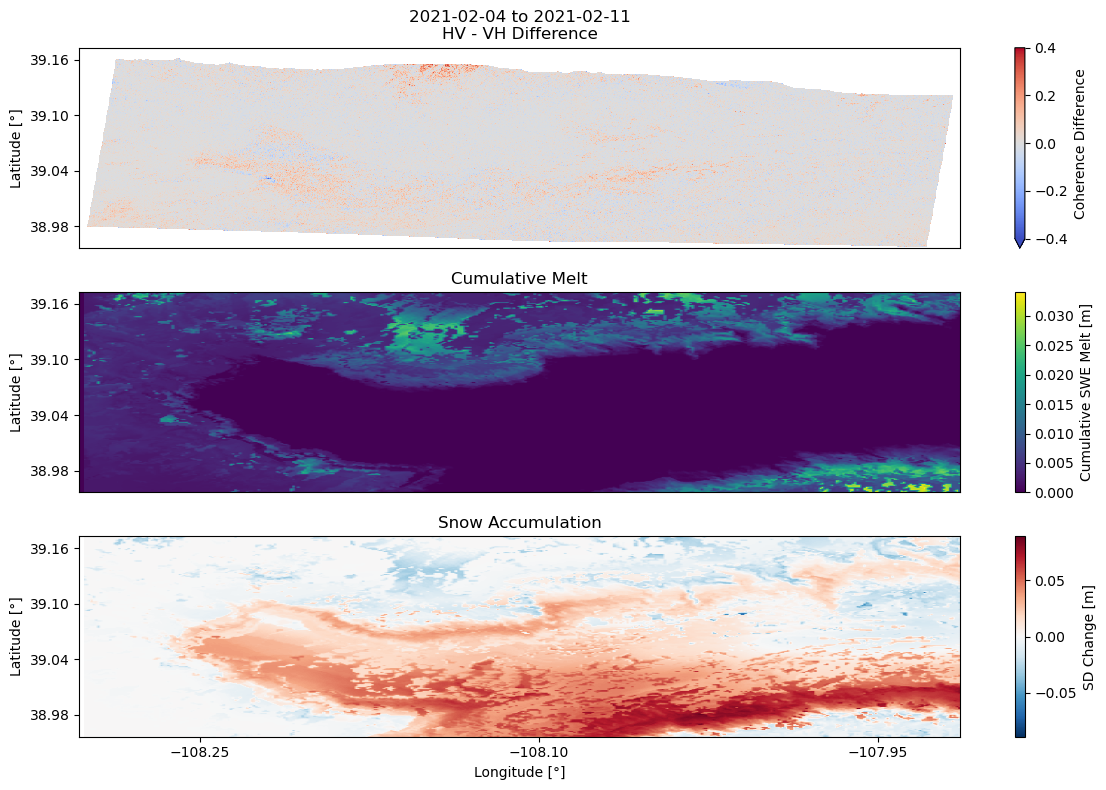

In [40]:
t = 5

fig, axes = plt.subplots(3, 1, figsize = (12, 8))
cross_diff.sel(time1 = ts[t][1], time2 = ts[t][2], heading = ts[t][0]).plot(vmax = 0.4, vmin = -0.4, cmap = 'coolwarm', ax = axes[0], cbar_kwargs = {'label': 'Coherence Difference'})
ds['model_melt'].sel(model_time = slice(ts[t][1], ts[t][2])).sum('model_time').plot(ax = axes[1], cbar_kwargs = {'label': 'Cumulative SWE Melt [m]'})
(ds['model_sd'].sel(model_time = ts[t][2]) - ds['model_sd'].sel(model_time = ts[t][1])).plot(ax = axes[2], cbar_kwargs = {'label': 'SD Change [m]'})

axes[0].set_title(f"{str(ts[t][1]).split('T')[0]} to {str(ts[t][2]).split('T')[0]}\nHV - VH Difference")
axes[1].set_title('Cumulative Melt')
axes[2].set_title('Snow Accumulation')
map_grid_clean(axes)
plt.tight_layout()

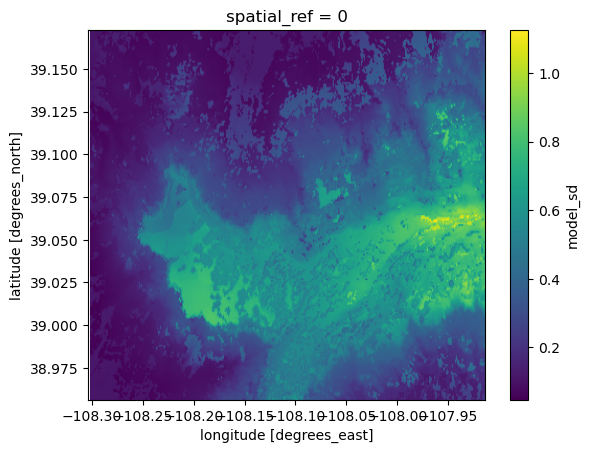

In [28]:
ds['model_sd'].max('model_time').plot()